# 1. Preparation

In [0]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.17 MiB | 7.90 MiB/s, done.
Resolving deltas: 100% (3923/3923), done.


In [0]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!cat Makefile
!make

/content/darknet
GPU=1
CUDNN=0
OPENCV=0
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]
#      -gencode arch=compute_20,code=[sm_20,sm_21] \ This one is deprecated?

# This is what I use, uncomment if you know your arch and want to specify
# ARCH= -gencode arch=compute_52,code=compute_52

VPATH=./src/:./examples
SLIB=libdarknet.so
ALIB=libdarknet.a
EXEC=darknet
OBJDIR=./obj/

CC=gcc
CPP=g++
NVCC=nvcc 
AR=ar
ARFLAGS=rcs
OPTS=-Ofast
LDFLAGS= -lm -pthread 
COMMON= -Iinclude/ -Isrc/
CFLAGS=-Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC

ifeq ($(OPENMP), 1) 
CFLAGS+= -fopenmp
endif

ifeq ($(DEBUG), 1) 
OPTS=-O0 -g
endif

CFLAGS+=$(OPTS)

ifeq ($(OPENCV), 1) 
COMMON+= -DOPENCV
CFLAGS+= -DOPENCV
LDFLAGS+= `pkg-config --libs opencv` -lstdc++
COMMON+= `pkg-config --cflags opencv` 
endif

ifeq ($(GPU), 1) 
CO

In [0]:
!mkdir VOCDataset
%cd VOCDataset
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

/content/darknet/VOCDataset
--2019-03-24 10:39:52--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  22.3MB/s    in 2m 32s  

2019-03-24 10:42:25 (12.5 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2019-03-24 10:42:26--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  22.6MB/s    in 21s     

2019

In [0]:
!chmod 755 ../scripts/voc_label.py
!python ../scripts/voc_label.py

In [0]:
%cd ../
!sed -i 's/\/home\/pjreddie\/data\/voc\/train.txt/VOCDataset\/train.txt/g' cfg/voc.data
!sed -i 's/\/home\/pjreddie\/data\/voc\/2007_test.txt/VOCDataset\/2007_test.txt/g' cfg/voc.data

/content/darknet


In [0]:
# If this is the first time to implement this notebook, scratch # and get initial weight.
# !wget https://pjreddie.com/media/files/darknet53.conv.74

In [0]:
!sed -i 's/ batch=1/# batch=1/g' cfg/yolov3-voc.cfg
!sed -i 's/# subdivisions=16/ subdivisions=32/g' cfg/yolov3-voc.cfg
!sed -i 's/ subdivisions=1/# subdivisions=1/g' cfg/yolov3-voc.cfg
!sed -i 's/# batch=64/ batch=128/g' cfg/yolov3-voc.cfg
!sed -i 's/max_batches = 50200/max_batches = 10000/g' cfg/yolov3-voc.cfg
!cat cfg/yolov3-voc.cfg

[net]
# Testing
# batch=1
# subdivisions=1
# Training
 batch=128
 subdivisions=32
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 10000
policy=steps
steps=40000,45000
scales=.1,.1



[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[convolutio

In [0]:
# If you have a trained weight in Google drive, mount Google drive and copy the weight.
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/'My Drive'/temp/yolov3-voc.backup ./yolov3-voc.backup

# 2. Train

In [0]:
# If this is the first time to implement this notebook, use upper one and if you want to use a trained weight, use lower one.
#!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg darknet53.conv.74
!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg yolov3-voc.backup

yolov3-voc
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8            

# 3. Test

In [0]:
# Don't use lower one. It uses coco.names to label. I'm not sure about the reason though. So anyway use upper one.
!./darknet detector test cfg/voc.data cfg/yolov3-voc.cfg yolov3-voc.backup VOCDataset/VOCdevkit/VOC2007/JPEGImages/000009.jpg
#!./darknet detect cfg/yolov3-voc.cfg yolov3-voc.backup VOCDataset/VOCdevkit/VOC2007/JPEGImages/000028.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


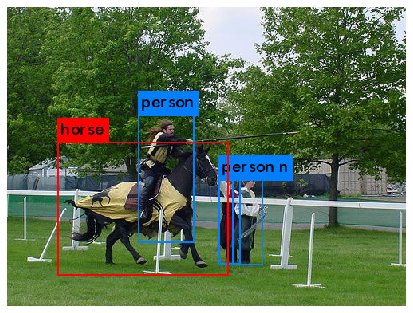

In [0]:
def display_image(file_path = './predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")
    ax.set_xticklabels([]) 
    ax.axis('off')

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)
    
display_image()